# Digit recognizer from scratch 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
raw_data = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [38]:
train.shape

(42000, 785)

In [6]:
data=raw_data.apply(lambda x: (x/255))
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


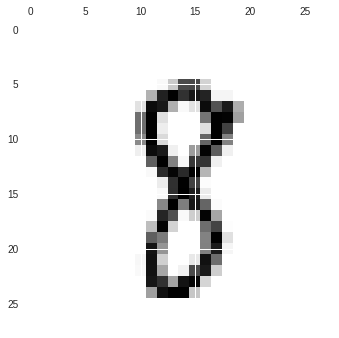

In [39]:
a = data.loc[46].values.reshape((28,28))
plt.matshow(a)
plt.show()

In [121]:
sigmoid = lambda x : 1/(1+np.exp(-x))
der_sigmoid = lambda x : sigmoid(x)(1-sigmoid(x))  
def recog_number(vec ,lays, bis, squish = sigmoid):
    '''
    recives vector representing number, plus the neural net and returns a length 10 vector of it guess
    '''
    for i in range(len(lays)):
        vec=squish(lays[i].dot(vec+bis[i]))
    return vec
# def ():

    

def cost_func(values,func,lays, bis):
    vec = np.zeros(10)
    num = values[1:]
    ans = values[1]
    vec[ans] = 1
    ret = func(vec = num,
               lays = layers, 
               bis = biases)
    return sum((ret-vec)**2)*.5

In [86]:
x = np.Symbol('x')
sigmoid = 1/(1+np.exp(-x))


AttributeError: module 'numpy' has no attribute 'Symbol'

In [46]:
len(np.zeros(10))

10

In [104]:
first_layer=(np.random.rand(20,784)*2-1).astype(np.float128)
second_layer=(np.random.rand(20,20)*2-1).astype(np.float128)
last_layer=(np.random.rand(10,20)*2-1).astype(np.float128)
layers = [first_layer,second_layer,last_layer]
first_bias = (np.random.rand(784)).astype(np.float128)
second_bias = np.random.rand(20).astype(np.float128)
third_bias = np.random.rand(20).astype(np.float128)
biases = [first_bias,second_bias,third_bias]

In [122]:
num=raw_data.loc[0].values
recog_number(vec = num, 
             lays = layers, 
             bis = biases)

array([ 0.0027337754,  0.98738435,  0.010811534,  0.98690445,  0.65397407,
        0.41331262,  0.9048664,  0.12050016,  0.7954173,  0.87407569], dtype=float128)

In [124]:
num=train.loc[0].values
cost_func(values=num,
          func=recog_number,
          lays = layers, 
          bis = biases)

2.6197402186487550059

In [123]:
cost = lambda x : cost_func(values=x,
                            func=recog_number,
                            lays = layers, 
                            bis = biases)
train_sample = train.head(int(len(train)*0.5))  
train_sample.apply(cost, axis=1).mean()

2.664516524902693